In [1]:
#notebook for creating:
#(1)a heatmap of the world with deaths caused by diarrhea
#(2)adding location pins to heatmap of highest and lowest GDP countries

In [88]:
from config import g_key
from config import w_key
import gmaps
import numpy as np
import pandas as pd
import requests
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt
from matplotlib import ticker


In [3]:
#import csv with total diarrhea deaths for all countries
#Deaths - Cause: All causes - Risk: Unsafe water source - Sex: Both - Age: All Ages (Number)

df = pd.read_csv("../sources/cleaned_risk_factor_deaths.csv")
df.head()

,Country,Code,Year,Deaths - Cause: All causes - Risk: Unsafe water source - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,2015.0,4796.0
1,Afghanistan,AFG,2016.0,4678.0
2,Afghanistan,AFG,2017.0,4632.0
3,Afghanistan,AFG,2018.0,3994.0
4,Afghanistan,AFG,2019.0,3751.0


In [4]:
deaths_2019 = df.loc[df["Year"] == 2019.0, :]
clean_deaths_2019 = deaths_2019.dropna()

#add lat and lng of citites from openweather to df
clean_deaths_2019


,Country,Code,Year,Deaths - Cause: All causes - Risk: Unsafe water source - Sex: Both - Age: All Ages (Number)
4,Afghanistan,AFG,2019.0,3751.0
14,Albania,ALB,2019.0,4.0
19,Algeria,DZA,2019.0,277.0
24,American Samoa,ASM,2019.0,2.0
29,Andorra,AND,2019.0,0.0
...,...,...,...,...
1089,Vietnam,VNM,2019.0,1251.0
1104,World,OWID_WRL,2019.0,1230154.0
1129,Yemen,YEM,2019.0,5351.0
1134,Zambia,ZMB,2019.0,5915.0


In [5]:
countries = clean_deaths_2019["Country"].to_list()

base_url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{base_url}&appid={w_key}&units={units}&q="

#create lists for needed info

country = []
lat = []
lng = []
index_counter = 0
set_counter = 1

print("Beginning Data Retrieval ")
print("-----------------------------")

for index, city in enumerate(countries, start = 1):
    try:
        response = requests.get(query_url + city).json()
        
        country.append(response["sys"]["country"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
    
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
            
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} | {city}")
        
    except:
        print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 | Afghanistan
Processing Record 2 of Set 1 | Albania
Processing Record 3 of Set 1 | Algeria
Processing Record 4 of Set 1 | American Samoa
Processing Record 5 of Set 1 | Andorra
Processing Record 6 of Set 1 | Angola
Processing Record 7 of Set 1 | Antigua and Barbuda
Processing Record 8 of Set 1 | Argentina
Processing Record 9 of Set 1 | Armenia
Processing Record 10 of Set 1 | Australia
Processing Record 11 of Set 1 | Austria
Processing Record 12 of Set 1 | Azerbaijan
Processing Record 13 of Set 1 | Bahamas
Processing Record 14 of Set 1 | Bahrain
Processing Record 15 of Set 1 | Bangladesh
Processing Record 16 of Set 1 | Barbados
Processing Record 17 of Set 1 | Belarus
Processing Record 18 of Set 1 | Belgium
Processing Record 19 of Set 1 | Belize
Processing Record 20 of Set 1 | Benin
Processing Record 21 of Set 1 | Bermuda
Processing Record 22 of Set 1 | Bhutan
Processing Record 23 of Set 1 | Bolivia
Proc

In [6]:
country_location = pd.DataFrame(list(zip(countries, lat, lng)))


country_location.columns = ['Country', 'Lat', 'Lng']
country_location.head()

,Country,Lat,Lng
0,Afghanistan,33.0000,66.0000
1,Albania,41.0000,20.0000
2,Algeria,28.0000,3.0000
3,American Samoa,-14.2338,-169.4777
4,Andorra,42.5000,1.5000


In [7]:
#merge the dataframes for countries and location in the same one
country_merge = pd.merge(clean_deaths_2019, country_location, on="Country", how="inner")
country_merge.head()

,Country,Code,Year,Deaths - Cause: All causes - Risk: Unsafe water source - Sex: Both - Age: All Ages (Number),Lat,Lng
0,Afghanistan,AFG,2019.0,3751.0,33.0000,66.0000
1,Albania,ALB,2019.0,4.0,41.0000,20.0000
2,Algeria,DZA,2019.0,277.0,28.0000,3.0000
3,American Samoa,ASM,2019.0,2.0,-14.2338,-169.4777
4,Andorra,AND,2019.0,0.0,42.5000,1.5000


In [8]:
renamed_df = country_merge.rename(columns={"Deaths - Cause: All causes - Risk: Unsafe water source - Sex: Both - Age: All Ages (Number)":"Deaths"})
renamed_df.head()

,Country,Code,Year,Deaths,Lat,Lng
0,Afghanistan,AFG,2019.0,3751.0,33.0000,66.0000
1,Albania,ALB,2019.0,4.0,41.0000,20.0000
2,Algeria,DZA,2019.0,277.0,28.0000,3.0000
3,American Samoa,ASM,2019.0,2.0,-14.2338,-169.4777
4,Andorra,AND,2019.0,0.0,42.5000,1.5000


In [9]:
#"Luxembourg", "Bermuda", "Switzerland", "Norway", "Madagascar", "Mozambique", "Malawi", "Somalia", "Burundi" :]


In [10]:
#import locations of highest and lowest GDP countries
#high: Monaco, Luxembourg, Bermuda, Switzerland, Norway 
#low: Madagascar, Mozambique, Malawi, Somalia, Burundi
#this df will also be used to create the line graph

gdp_countries = ["Monaco", "Luxembourg", "Bermuda", "Switzerland", "Norway", "Madagascar", "Mozambique", "Malawi", "Somalia", "Burundi"]

gdp_df = renamed_df.loc[renamed_df["Country"].isin(gdp_countries)]
gdp_df


,Country,Code,Year,Deaths,Lat,Lng
20,Bermuda,BMU,2019.0,0.0,32.3333,-64.7500
29,Burundi,BDI,2019.0,8097.0,-3.5000,30.0000
103,Luxembourg,LUX,2019.0,0.0,2.5000,112.5000
104,Madagascar,MDG,2019.0,15677.0,3.2000,73.0000
105,Malawi,MWI,2019.0,6472.0,12.0790,-12.2982
116,Monaco,MCO,2019.0,0.0,-18.2500,35.0000
120,Mozambique,MOZ,2019.0,7638.0,28.0000,84.0000
134,Norway,NOR,2019.0,8.0,31.9216,35.2033
166,Somalia,SOM,2019.0,14449.0,4.0000,-56.0000
175,Switzerland,CHE,2019.0,5.0,8.0000,1.1667


In [11]:
#create heatmap
#show fig

gmaps.configure(api_key=g_key)

locations = renamed_df[["Lat", "Lng"]]
humidity = renamed_df["Deaths"]
fig =gmaps.figure(center= [0,0], zoom_level=2.45)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=True, max_intensity=6000, point_radius=20)
fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [12]:
#get location pins and add to heatmap
#show fig

In [74]:
#create line graph from gdp_countries dataframrenamed_df = country_merge.rename(columns={"Deaths - Cause: All causes - Risk: Unsafe water source - Sex: Both - Age: All Ages (Number)":"Deaths"})
data_df = df.rename(columns={"Deaths - Cause: All causes - Risk: Unsafe water source - Sex: Both - Age: All Ages (Number)":"Deaths"})
data_df = data_df.dropna(how='any')
data_df = data_df.astype({"Year": int})
data_df

,Country,Code,Year,Deaths
0,Afghanistan,AFG,2015,4796.0
1,Afghanistan,AFG,2016,4678.0
2,Afghanistan,AFG,2017,4632.0
3,Afghanistan,AFG,2018,3994.0
4,Afghanistan,AFG,2019,3751.0
...,...,...,...,...
1135,Zimbabwe,ZWE,2015,4336.0
1136,Zimbabwe,ZWE,2016,4244.0
1137,Zimbabwe,ZWE,2017,4193.0
1138,Zimbabwe,ZWE,2018,4013.0


In [75]:
#"Monaco", "Luxembourg", "Bermuda", "Switzerland", "Norway", "Madagascar", "Mozambique", "Malawi", "Somalia", "Burundi"

monaco = data_df.loc[data_df["Country"] == "Monaco"]
monaco


,Country,Code,Year,Deaths
625,Monaco,MCO,2015,0.0
626,Monaco,MCO,2016,0.0
627,Monaco,MCO,2017,0.0
628,Monaco,MCO,2018,0.0
629,Monaco,MCO,2019,0.0


In [76]:
luxem = data_df.loc[data_df["Country"] == "Luxembourg"]
luxem

,Country,Code,Year,Deaths
555,Luxembourg,LUX,2015,0.0
556,Luxembourg,LUX,2016,0.0
557,Luxembourg,LUX,2017,0.0
558,Luxembourg,LUX,2018,0.0
559,Luxembourg,LUX,2019,0.0


In [77]:
bermuda = data_df.loc[data_df["Country"] == "Bermuda"]
bermuda

,Country,Code,Year,Deaths
105,Bermuda,BMU,2015,0.0
106,Bermuda,BMU,2016,0.0
107,Bermuda,BMU,2017,0.0
108,Bermuda,BMU,2018,0.0
109,Bermuda,BMU,2019,0.0


In [78]:
switz = data_df.loc[data_df["Country"] == "Switzerland"]
switz

,Country,Code,Year,Deaths
960,Switzerland,CHE,2015,5.0
961,Switzerland,CHE,2016,5.0
962,Switzerland,CHE,2017,5.0
963,Switzerland,CHE,2018,5.0
964,Switzerland,CHE,2019,5.0


In [79]:
norway = data_df.loc[data_df["Country"] == "Norway"]
norway

,Country,Code,Year,Deaths
725,Norway,NOR,2015,8.0
726,Norway,NOR,2016,8.0
727,Norway,NOR,2017,8.0
728,Norway,NOR,2018,8.0
729,Norway,NOR,2019,8.0


In [80]:
madagas = data_df.loc[data_df["Country"] == "Madagascar"]
madagas

,Country,Code,Year,Deaths
560,Madagascar,MDG,2015,18034.0
561,Madagascar,MDG,2016,17449.0
562,Madagascar,MDG,2017,17237.0
563,Madagascar,MDG,2018,16413.0
564,Madagascar,MDG,2019,15677.0


In [81]:
mozam = data_df.loc[data_df["Country"] == "Mozambique"]
mozam

,Country,Code,Year,Deaths
645,Mozambique,MOZ,2015,8613.0
646,Mozambique,MOZ,2016,8213.0
647,Mozambique,MOZ,2017,7982.0
648,Mozambique,MOZ,2018,7559.0
649,Mozambique,MOZ,2019,7638.0


In [82]:
malawi = data_df.loc[data_df["Country"] == "Malawi"]
malawi

,Country,Code,Year,Deaths
565,Malawi,MWI,2015,7022.0
566,Malawi,MWI,2016,6921.0
567,Malawi,MWI,2017,6885.0
568,Malawi,MWI,2018,6670.0
569,Malawi,MWI,2019,6472.0


In [83]:
somalia = data_df.loc[data_df["Country"] == "Somalia"]
somalia

,Country,Code,Year,Deaths
900,Somalia,SOM,2015,13203.0
901,Somalia,SOM,2016,13888.0
902,Somalia,SOM,2017,13740.0
903,Somalia,SOM,2018,13944.0
904,Somalia,SOM,2019,14449.0


In [84]:
burundi = data_df.loc[data_df["Country"] == "Burundi"]
burundi

,Country,Code,Year,Deaths
150,Burundi,BDI,2015,8343.0
151,Burundi,BDI,2016,7937.0
152,Burundi,BDI,2017,7782.0
153,Burundi,BDI,2018,8130.0
154,Burundi,BDI,2019,8097.0


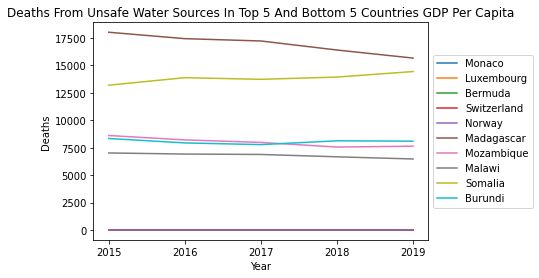

In [96]:
#"Monaco", "Luxembourg", "Bermuda", "Switzerland", "Norway", "Madagascar", "Mozambique", "Malawi", "Somalia", "Burundi"


plt.plot(monaco["Year"].astype(str), monaco["Deaths"], label='Monaco')
plt.plot(luxem["Year"].astype(str), luxem["Deaths"], label='Luxembourg')
plt.plot(bermuda["Year"].astype(str), bermuda["Deaths"], label='Bermuda')
plt.plot(switz["Year"].astype(str), switz["Deaths"], label='Switzerland')
plt.plot(norway["Year"].astype(str), norway["Deaths"], label='Norway')
plt.plot(madagas["Year"].astype(str), madagas["Deaths"], label='Madagascar')
plt.plot(mozam["Year"].astype(str), mozam["Deaths"], label='Mozambique')
plt.plot(malawi["Year"].astype(str), malawi["Deaths"], label='Malawi')
plt.plot(somalia["Year"].astype(str), somalia["Deaths"], label='Somalia')
plt.plot(burundi["Year"].astype(str), burundi["Deaths"], label='Burundi')


plt.title("Deaths From Unsafe Water Sources In Top 5 And Bottom 5 Countries GDP Per Capita")
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
